In [98]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [99]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    #print(sigma2)
    
    return Cov,sigma2

X = sym.Symbol('x',real=True)

# Espectros de átomos y espectroscopía.

Datos

In [100]:
#Experimental

H = np.array([324., 363., 498.])
He = np.array([506., 534., 559., 570., 675., 776.])
Hg = np.array([338., 428., 455.])
Ne = np.array([853., 955.])

In [101]:
#Teórico

H_ = np.array([434.0472, 486.1298, 656.279])
He_ = np.array([388.8648, 447.148, 587.564, 706.519, 1083.339, 1868.534])
Hg_ = np.array([435.83, 546.07, 576.56])
Ne_ = np.array([])

Plots Píxeles vs Longitudes de onda

In [102]:
param = Minimos_cuadrados(H_,H)
_x = np.linspace(np.min(H_),np.max(H_),50)
_y = GetModel(_x,param)
GetModel(X,param)
Cov,sigma = GetError(H_,H,param)
delta_m = Cov[0][0]
delta_b = Cov[-1][-1]
Cov

array([[ 2.03514312e+01, -3.75056555e-02],
       [-3.75056555e-02,  7.13733631e-05]])

Regresión lineal: y = 0.7860x + -17.7990


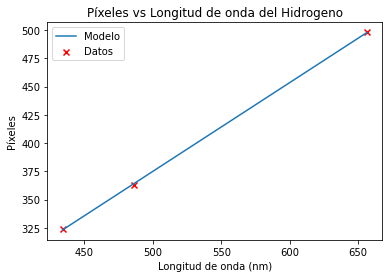

In [103]:
#Plot del Hidrógeno
plt.scatter(H_,H,label='Datos',color='r',marker='x')
plt.plot(_x,_y,label='Modelo')
plt.title('Píxeles vs Longitud de onda del Hidrogeno')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Píxeles')
plt.legend()
print(f"Regresión lineal: y = {round(param[1],3):.4f}x + {round(param[0],3):.4f}")

-helio

In [104]:
param = Minimos_cuadrados(He_,He)
_x = np.linspace(np.min(He_),np.max(He_),50)
_y = GetModel(_x,param)
GetModel(X,param)
Cov,sigma = GetError(He_,He,param)
delta_m = Cov[0][0]
delta_b = Cov[-1][-1]
Cov

array([[ 1.99358883e+02, -1.72872325e-01],
       [-1.72872325e-01,  2.04100811e-04]])

Regresión lineal: y = 0.1810x + 449.9460


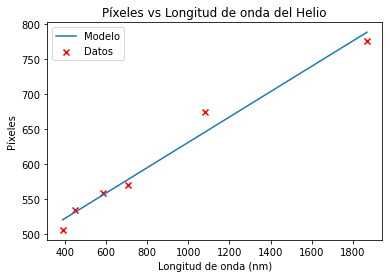

In [105]:
#Plot del Helio
plt.scatter(He_,He,label='Datos',color='r',marker='x')
plt.plot(_x,_y,label='Modelo')
plt.title('Píxeles vs Longitud de onda del Helio')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Píxeles')
plt.legend()
print(f"Regresión lineal: y = {round(param[1],3):.4f}x + {round(param[0],3):.4f}")

In [106]:
param = Minimos_cuadrados(Hg_,Hg)
_x = np.linspace(np.min(Hg_),np.max(Hg_),50)
_y = GetModel(_x,param)
GetModel(X,param)
Cov,sigma = GetError(Hg_,Hg,param)
delta_m = Cov[0][0]
delta_b = Cov[-1][-1]
Cov

array([[ 4.09683837e+01, -7.78096148e-02],
       [-7.78096148e-02,  1.49781736e-04]])

Regresión lineal: y = 0.8270x + -22.8100


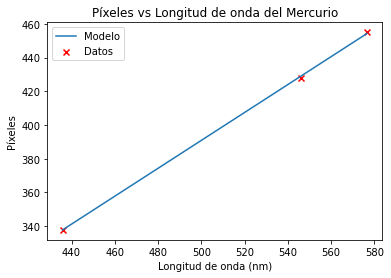

In [107]:
#Plot del Mercurio
plt.scatter(Hg_,Hg,label='Datos',color='r',marker='x')
plt.plot(_x,_y,label='Modelo')
plt.title('Píxeles vs Longitud de onda del Mercurio')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Píxeles')
plt.legend()
print(f"Regresión lineal: y = {round(param[1],3):.4f}x + {round(param[0],3):.4f}")